# DATA PROCESSING

Importing all necessary Python modules and libraries

In [1]:
'''Importing Python modules and libraries for Data Processing'''
import csv
import json

'''Importing Python modules and libraries for Data Visualisation'''
import numpy as np
import pandas as pd
import seaborn as sns
import math

## Task 1

Reading in csv file and printing header along with their corresponding index 

In [2]:
with open('acw_user_data.csv') as csv_file: # Using context manager to open and read csv file
    csv_reader = csv.reader( csv_file, delimiter=',' )
    
    for line_number, line in enumerate(csv_reader):
        '''Breaking at the first iteration to obtain the csv header'''
        if line_number == 0: 
            break

'''printing every item on the header list along with their corresponding index'''
for i in range(len(line)):
    print(i, line[i])

0 Address Street
1 Address City
2 Address Postcode
3 Age (Years)
4 Distance Commuted to Work (miles)
5 Employer Company
6 Credit Card Start Date
7 Credit Card Expiry Date
8 Credit Card Number
9 Credit Card CVV
10 Dependants
11 First Name
12 Bank IBAN
13 Last Name
14 Marital Status
15 Yearly Pension (GBP)
16 Retired
17 Yearly Salary (GBP)
18 Sex
19 Vehicle Make
20 Vehicle Model
21 Vehicle Year
22 Vehicle Type


## Task 2 & 3

Converting csv flat file structure to nested dictionaries.

Identifying and modifying rows with empty 'Dependants' entry

In [3]:
# Using context manager to open and read csv file
with open('acw_user_data.csv', "r") as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    acw_data = [] # initializing an empty list to store dictionaries.
    problematic = [] # initializing an empty list to store dependants empty rows.
    
    for row_number, row in enumerate(csvreader):
        result = {} # initializing an empty dictionary for every row and iteration.
        
        if row_number == 0: # To skip the first line (File Header)
            continue
                
        result['first_name'] = row[11]  # string datatype
        result['last_name'] = row[13] # string datatype
        result['age'] = int(row[3]) # string datatype converted to integer
        result['sex'] = row[18] # string datatype
        result['retired'] = eval(row[16]) # string datatype
        result['marital_status'] = row[14] # string datatype
        
        '''dependants may contain empty string values or invalid entry.'''
        try:
            result['dependants'] = int(row[10]) # converting to integer
        except ValueError:
            result['dependants'] = 0 # catches error if value cannot be converted
            problematic.append(row_number) # append row_number to problematic list
            
        result['salary'] = float(row[17]) # string datatype converted to float
        result['pension'] = float(row[15]) # string datatype converted to float
        result['company'] = row[5] # string datatype 
        result['commute_distance'] = float(row[4]) # string datatype converted to float
        
        # Nested Dictionaries
        result['Vehicle'] = {'make':row[19], # string datatype 
                             'model':row[20], # string datatype
                             'year':row[21], # string datatype
                             'type':row[22]}  # string datatype
        
        result['Credit Card'] = {'start_date':row[6], # string datatype
                                 'end_date':row[7],  # string datatype
                                 'card_number':int(row[8]),  # string datatype to integer
                                 'cvv': int(row[9]),  # string datatype to integer
                                 'iban':row[12]}  # string datatype
        
        result['Address'] = {'street':row[0],  # string datatype
                             'city':row[1],  # string datatype
                             'postcode':row[2]}  # string datatype
        
        acw_data.append(result) # append dictionary to data list after every iteration

In [4]:
# printing list of rows that contained empty entries
print(f'{len(problematic)} Problematic rows for dependants: {problematic}')  

19 Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## Task 4

Writing compiled data to 'processed.json' file.

In [5]:
def process_json(name, data):
    """processes json files

    Parameters
    ----------
    name : str
        The name of the json file
    data : Python object - [dict, list, tuple, string, int, float, True, False, None]
        The data to written to file.

    Returns
    -------
    None
    """
    
    with open(f'{name}.json ', mode='w') as jfile:
        json.dump(data, jfile) 

In [6]:
process_json('processed', acw_data) # using process_json function

## Task 5

Creating two JSON files for retirees and employed customers namely 'retired.json' and 'employed.json' respectively.

In [7]:
retired_data = [] # initialize empty list for retired data
employed_data = [] # initialize empty list for employed data

for idx in range(len(acw_data)):
    if acw_data[idx]['retired']:  # if value is TRUE 
        retired_data.append(acw_data[idx]) # append the row to retired list
    else: # if value is FALSE
        employed_data.append(acw_data[idx]) # append the row to employed list 

In [8]:
# applying the user-defined function to process the two JSON files
process_json('retired', retired_data) 
process_json('employed', employed_data)

## Task 6
Flagging customers with more than 10 years between credit card start and end date and writing them to 'remove_ccard.json' file.

In [9]:
def check_ccard(data_row):
    """processes a row of data to determine invalid credit cards

    Parameters
    ----------
    data_row : dictionary
        data collection to be processed

    Returns
    -------
    Boolean 
        True means row should be removed.
    """
    
    '''assigning indexed information to respective variables'''
    start_date = data_row['Credit Card']['start_date'] 
    end_date = data_row['Credit Card']['end_date']
    
    ''' computation to extract relevant data, determine the difference and compare if greater than 10'''
    if (int(end_date[-2:]) - int(start_date[-2:])) > 10: 
        return True 
    
    else:
        return False   

In [10]:
'''Using list comprehension to filter records that fall into the invalid card category'''
remove_ccardlist = [record for record in acw_data if check_ccard(record) is True]

# processing remove_ccard JSON file
process_json('remove_ccard', remove_ccardlist)

## Task 7
Calculating and appending Salary/Commute to dictionary loaded from 'processed.json'.

In [11]:
# Implementing Context Manager to read created JSON file
with open('processed.json', mode='r') as json_file:
    acw_json = json.load(json_file)

### Task 7a
Calculating and appending Salary-Commute attribute to acw_json dictionary

In [12]:
'''Iterating through processed dictionary to calculate Salary-Commute and append to dictionary'''

for person in range(len(acw_json)):
    
    if acw_json[person]['commute_distance'] > 1: # Checking condition before calculation 
        acw_json[person]["Salary-Commute"] = acw_json[person]["salary"]/acw_json[person]['commute_distance']
    
    else: # else, Salary-Commute is the same as Salary
        acw_json[person]["Salary-Commute"] = acw_json[person]["salary"]

### Task 7b
Sorting dictionary in ascending order by Salary-Commute

In [13]:
'''Sorting dictionary with sorted() function
Using lambda to define attribute for sorting'''

acw_json = sorted(acw_json, key=lambda i: i['Salary-Commute'])

### Task 7c
Processing 'commute.json' file from updated dictionary

In [14]:
# processing commute JSON file.
process_json('commute', acw_json)

# DATA VISUALISATION

Reading in the original 'acw_user_data.csv' file as acw_df

In [15]:
acw_df = pd.read_csv('acw_user_data.csv')

## Task 1
Obtaining Data Series for Salary and Age

In [16]:
salary = acw_df['Yearly Salary (GBP)'] # Salary Data Series
age = acw_df['Age (Years)'] # Age Data Series

### Task 1a
Calculating Mean Salary

In [17]:
print(f'Mean Salary is ', salary.mean()) # Using mean() function to compute Mean Salary

Mean Salary is  57814.078


### Task 1b
Calculating Median Age

In [18]:
print(f'Median age is ', age.median()) # Using median() function to compute Median Age 

Median age is  54.0


## Task 2
Performing univariate plots: Age, Dependants, and Age conditioned on Marital Status

In [19]:
fig_to_save = {} # initializing empty dictionary to store plot handles.

### Task 2a
Age plot, calculating required bins

In [20]:
'''According to Freedman-Diaconis rule: bins = ceil((max - min)/bin_width) '''

bins = math.ceil((age.max() - age.min())/5) # where bin_width = 5
print(f'No of bins should be: ', bins)

No of bins should be:  15


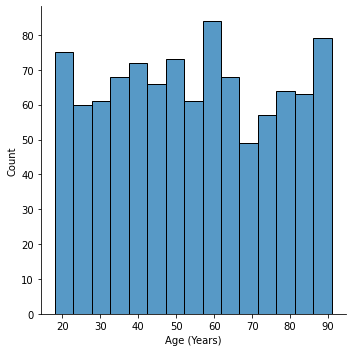

In [21]:
age_plot = sns.displot(data=acw_df, x='Age (Years)', bins=15) # plotting Age
fig_to_save['./age.png'] = age_plot # adding key-value to fig_to_save dictionary

### Task 2b 
Plotting Dependents, and fixing data errors with seaborn itself

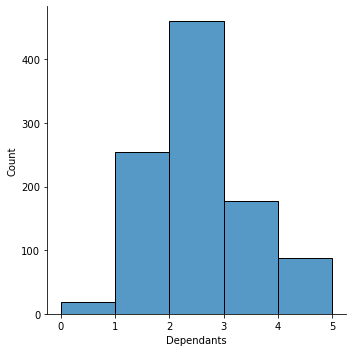

In [22]:
'''plotting Dependants, also using fillna() function to remove Nan values'''

dependant_plot = sns.displot(data=acw_df, x=acw_df['Dependants'].fillna(0), binwidth=1)
fig_to_save['./dependant.png'] = dependant_plot # adding key-value to fig_to_save dictionary

### Task 2c
Plotting Age (of default bins), conditioned on Marital Status

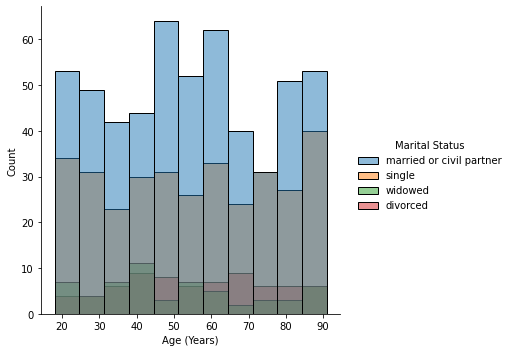

In [23]:
'''Plotting Age conditioned by Marital Status with use of 'hue' argument.'''

age_marital_plot = sns.displot(data=acw_df, x='Age (Years)', hue='Marital Status')
fig_to_save['./age_marital.png'] = age_marital_plot # adding key-value to fig_to_save dictionary

## Task 3
Performing multivariate plots: Commute against Salary, Age against Salary, Age against Salary conditioned by Dependants

### Task 3a 
Plotting Commuted distance against salary

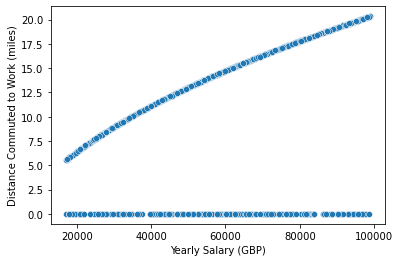

In [24]:
salary_commute_plot = sns.scatterplot(data=acw_df, x='Yearly Salary (GBP)', y='Distance Commuted to Work (miles)')
fig_to_save['./sal_commute.png'] = salary_commute_plot

### Task 3b
Plotting Age against Salary

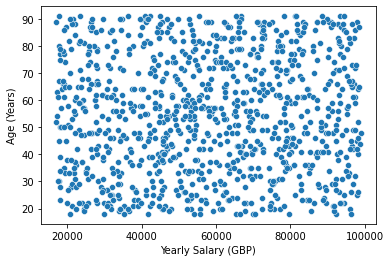

In [25]:
salary_age_plot = sns.scatterplot(data=acw_df, x='Yearly Salary (GBP)', y='Age (Years)')
fig_to_save['./sal_age.png'] = salary_age_plot

### Task 3c
Plotting Age against Salary conditioned by Dependants

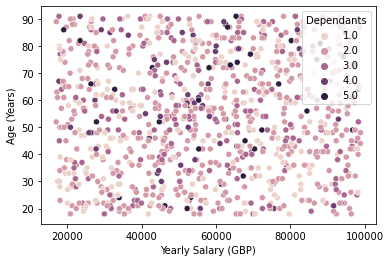

In [26]:
salary_age_dep_plot = sns.scatterplot(data=acw_df, x='Yearly Salary (GBP)', y='Age (Years)', hue = 'Dependants')
fig_to_save['./sal_age_dep.png'] = salary_age_dep_plot

## Task 4

Saving plots as png files

In [27]:
for fig in fig_to_save: # Implementing for loop to create png files of plots.  
    try:
        fig_to_save[fig].savefig(fig)
    
    except AttributeError: # if plot is an AxesSubplot
        fig_to_save[fig].get_figure().savefig(fig)